In [1]:
import pandas as pd
import numpy as np
from  pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
processed_data=pd.read_csv("ProcessedData.csv",encoding="latin1")

In [3]:
processed_data.head()

,date,device,smoothed_temperature,smoothed_pressure,smoothed_waterFraction
0,1/1/2010 0:00,42001,0.419956,2.297892,1.342423
1,1/1/2010 1:00,42001,0.438078,2.312392,1.342423
2,1/1/2010 2:00,42001,0.462535,2.326438,1.380211
3,1/1/2010 3:00,42001,0.570786,2.600585,1.397940
4,1/1/2010 4:00,42001,0.570786,2.674917,1.623249


In [4]:
processed_data.drop(columns={'date','device'},axis=1,inplace=True)

In [5]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   smoothed_temperature    5028 non-null   float64
 1   smoothed_pressure       5028 non-null   float64
 2   smoothed_waterFraction  5028 non-null   float64
dtypes: float64(3)
memory usage: 118.0 KB


In [6]:
X_train=processed_data

In [7]:
X_train =StandardScaler().fit_transform(X_train)
X_train =pd.DataFrame(X_train)

In [8]:
clf1 = AutoEncoder(hidden_neurons =[3, 1, 1, 3])
clf1.fit(X_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dropout_2 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4

142/142 [==============================] - 0s 2ms/step - loss: 1.0006 - val_loss: 1.0125
Epoch 62/100
142/142 [==============================] - 0s 1ms/step - loss: 1.0005 - val_loss: 1.0124
Epoch 63/100
142/142 [==============================] - 0s 2ms/step - loss: 1.0004 - val_loss: 1.0124
Epoch 64/100
142/142 [==============================] - 0s 2ms/step - loss: 1.0003 - val_loss: 1.0123
Epoch 65/100
142/142 [==============================] - 0s 2ms/step - loss: 1.0002 - val_loss: 1.0122
Epoch 66/100
142/142 [==============================] - 0s 2ms/step - loss: 1.0002 - val_loss: 1.0122
Epoch 67/100
142/142 [==============================] - 0s 1ms/step - loss: 1.0001 - val_loss: 1.0121
Epoch 68/100
142/142 [==============================] - 0s 2ms/step - loss: 1.0001 - val_loss: 1.0121
Epoch 69/100
142/142 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0120
Epoch 70/100
142/142 [==============================] - 0s 2ms/step - loss: 0.9999 - val_loss: 

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[3, 1, 1, 3],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000001ACD2898E18>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [9]:
# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  
y_train_scores[128]


2.1899363725586727

In [10]:
td=pd.read_csv("test.csv",encoding="latin1")

In [11]:
X_test=td

In [12]:
X_test  =StandardScaler().fit_transform(X_test)
X_test  =pd.DataFrame(X_test)

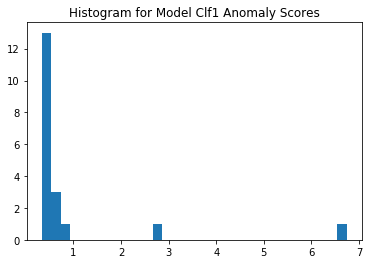

In [14]:
# Predict the anomaly scores
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()